In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from keras.models import load_model
import os
save_dir = '/content/drive/My Drive/model'
model_name = 'keras_cifar10_trained_model.h5'
model_path = os.path.join(save_dir, model_name)

model = load_model(model_path)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
import random
import keras

np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print("Done loading data")



170500096/170498071 [==============================] - 2s 0us/step
Done loading data


In [ ]:
from keras.utils import to_categorical
import numpy as np

# np.random.seed(1)
# tf.random.set_seed(0)
# random.seed(0)

i=0
final_choices = []
attack_targets = []
while i < 5:
  ind = np.random.choice(range(10000), size=1)
  # print(ind)
  predictions= model.predict(x_test[ind])
  pred = np.argmax(predictions)
  target = np.argsort(predictions[0])[-4]
  # print(target)
  true = y_test[ind[0]][0]
  # print(f"Pred {pred} true {true}")
  if pred == true:
    final_choices.append(ind)
    attack_targets.append(target)
    i+=1
    print(f"Prediction {pred} True lable {true} Attack {target}")


# choices = np.random.choice(range(10000), size=10)


Prediction 0 True lable 0 Attack 1
Prediction 3 True lable 3 Attack 6
Prediction 3 True lable 3 Attack 7
Prediction 2 True lable 2 Attack 4
Prediction 4 True lable 4 Attack 5


Pred 0 Attack 1 True 0
Pred 0 Attack 1 True 0
Pred 0 Attack 1 True 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred 1 Attack 1 True 0
Attack automobile True airplane
Attack Successful


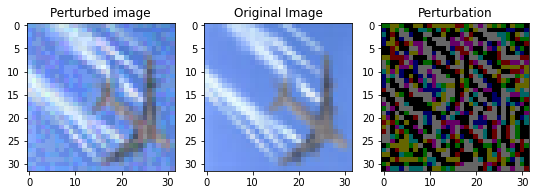

Pred 6 Attack 6 True 3
Attack frog True cat
Attack Successful


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


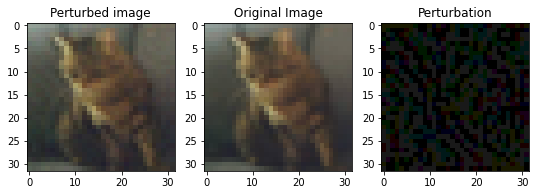

Pred 3 Attack 7 True 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred 7 Attack 7 True 3
Attack horse True cat
Attack Successful


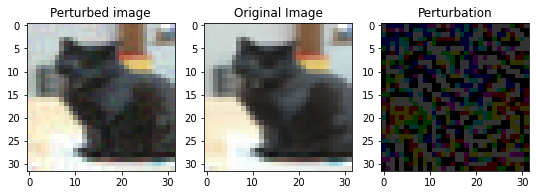

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred 4 Attack 4 True 2
Attack deer True bird
Attack Successful


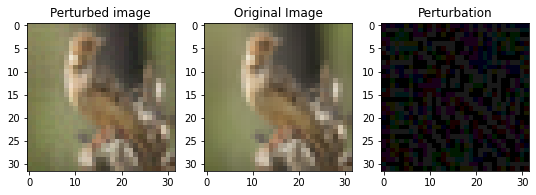

Pred 4 Attack 5 True 4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pred 5 Attack 5 True 4
Attack dog True deer
Attack Successful


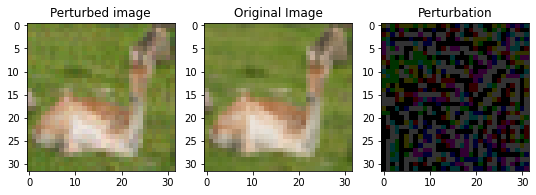

In [ ]:
from keras import backend as K
from keras.losses import categorical_crossentropy, CategoricalCrossentropy
from matplotlib import pyplot as plt
import tensorflow.keras.backend as T

import tensorflow as tf

num_classes = 10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for indx, attack_label in zip(final_choices,attack_targets):
  true_target = y_test[indx][0][0]
  
  
  image=x_test[indx]
  attack_target = to_categorical(attack_label, num_classes)
  attack_target = tf.reshape(attack_target,(1,10))
  epsilon = 0.01
  epochs = 4
  perturbed_image = image
  attack_success=False
  for i in range(epochs):
    loss = -1*K.categorical_crossentropy(attack_target, model.output)
    grads = K.gradients(loss,model.input)
    iterate = K.function(model.input, grads)
    grad_output = iterate(image)[0]
    signed_grad = K.sign(grad_output)    
    perturbed_image = perturbed_image + epsilon*signed_grad
    np_perturbed_image = np.array(perturbed_image)
    perturbed_pred = model.predict(np_perturbed_image)
    print(f"Pred {np.argmax(perturbed_pred)} Attack {np.argmax(attack_target)} True {true_target}")
    # print(f"True Label {true_target} Target label {np.argmax(attack_target)} Perturbed label {np.argmax(perturbed_pred)}")
    if  np.argmax(perturbed_pred) == np.argmax(attack_target):
      print(f"Attack {class_labels[np.argmax(attack_target)]} True {class_labels[true_target]}")
      print("Attack Successful")
      attack_success=True

      break
     
  # print(np_perturbed_image.shape)
  fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(9,3))
  ax1.set_title("Perturbed image")
  ax1.imshow(np_perturbed_image[0])
  ax2.set_title("Original Image")
  ax2.imshow(image[0])
  ax3.set_title("Perturbation")
  ax3.imshow((np_perturbed_image[0] - image[0])*10)
  plt.show()
  if attack_success:
    fig.savefig(f"/content/drive/My Drive/{indx[0]}_{attack_success}_true{class_labels[true_target]}_attack{class_labels[attack_label]}.png")
  
  # break

